In [1]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.utils import *
from aeons.endpoint import EndModel, theta_basic, theta_bandwidth, theta_bandwidth_trunc
from aeons.plotting import *
from aeons.regress import *

### Cauchy

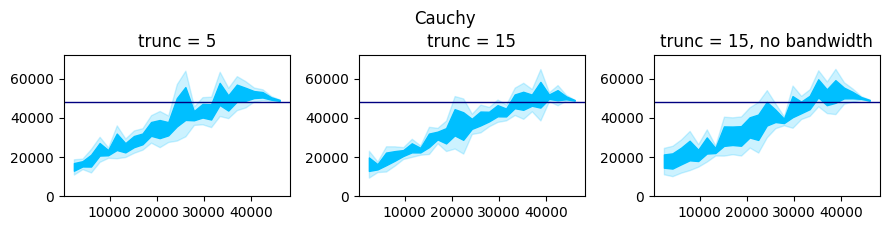

In [5]:
samples = pickle_in(f"{aeons_dir}/samples/toy/cauchy_10_0001.pickle")
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

fig, axs = plt.subplots(1, 3, figsize=(9,2.5))
iterations, logXfs, logXfs_std = read_from_txt("lcdm/cauchy_bt_25_t5.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5, ax=axs[0])

iterations, logXfs, logXfs_std = read_from_txt("cauchy/cauchy_bt_25_trunc15.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5, ax=axs[1])

iterations, logXfs, logXfs_std = read_from_txt("cauchy/cauchy_bt_25_t15_s1.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5, ax=axs[2])

axs[0].set_title("trunc = 5")
axs[1].set_title("trunc = 15")
axs[2].set_title("trunc = 15, no bandwidth")
fig.suptitle('Cauchy', y=.9)
fig.tight_layout()

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Text(0.5, 1.0, '[5.5e+03, 9366.8, 9e-03]')

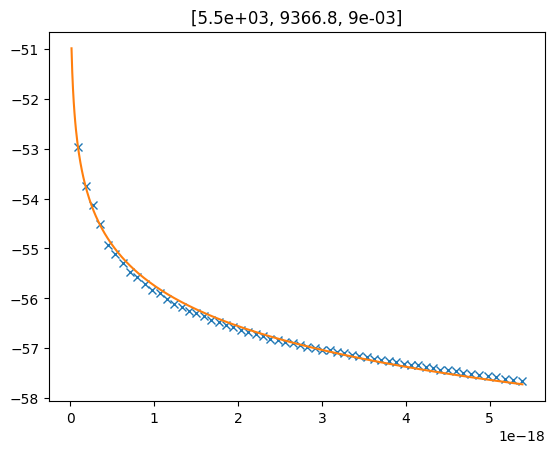

In [ ]:
ndead = 20000
points = points_at_iteration(samples, ndead)
logX, logL = np.array(points.logX()), np.array(points.logL)
X = np.exp(logX)
ndeadinc = 100
X, logL = X[ndead - ndeadinc:], logL[ndead - ndeadinc:]
theta = analytic_lm_params(logL, X, d0=1)
plt.plot(X[::10], logL[::10], 'x')
plt.plot(X, full.func(X, theta))
plt.title(formatt(theta))

### Gaussian - truncation evidence

In [11]:
name, samples = get_samples("toy", "gauss_30_01")
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = samples.logX().iloc[true_endpoint]

In [25]:
ndead = 20000
logLall, Xall, nk, logZdead = model.data(ndead)
window = np.arange(ndead - 2000, len(Xall))
logLd, Xd = logLall[window], Xall[window]

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


In [27]:
# Get logXf and endpoints for Nset samples of X
Nset = 25
logXf_i = np.zeros(Nset)
endpoints_i = np.zeros(Nset)
for i in range(Nset):
    X = generate_Xs(nk)[window]
    theta = analytic_lm_params(logLd, X, d0=1)
    logXf_i[i] = logXf_formula(theta, logZdead, Xall[ndead], epsilon=1e-3)
    endpoints_i[i] = calc_endpoints([ndead], np.log(Xall[ndead]), logXf_i[i], 0, nlive=500)[0]
# Remove outliers
logXf_i = logXf_i[~np.isnan(logXf_i)]
logXf_i = reject_outliers(logXf_i)
endpoints_i = endpoints_i[~np.isnan(endpoints_i)]
endpoints_i = reject_outliers(endpoints_i)
print(f"Mean logXf: {np.mean(logXf_i)}, std: {np.std(logXf_i)}")
print(f"Mean endpoint: {np.mean(endpoints_i)}, std: {np.std(endpoints_i)}")

Mean logXf: -94.08882935147172, std: 3.865133706183689
Mean endpoint: 47063.39103970134, std: 1932.5668530918445


In [28]:
true_endpoint

50609

In [9]:
from ipywidgets import interact, IntSlider
@interact(trunc=IntSlider(min=5, max=500, step=25))
def func(trunc):
    plot_split(model, ndead=25000, trunc=trunc, splits=1)

interactive(children=(IntSlider(value=5, description='trunc', max=500, min=5, step=25), Output()), _dom_classe…

### Wedding

In [ ]:
root = "toy"
name, samples = get_samples(root, "wedding_20_001")
model = EndModel(samples)
true_endpoint = model.true_endpoint()

In [ ]:
np.linspace(0.01*true_endpoint, true_endpoint, 10, endpoint=False).astype(int)

array([  386,  4210,  8035, 11860, 15684, 19509, 23334, 27158, 30983,
       34808])

In [ ]:
from ipywidgets import interact, IntSlider
@interact(trunc=IntSlider(min=1, max=500, step=15))
def func(trunc):
    plot_split(model, ndead=8035, trunc=trunc, splits=1)

interactive(children=(IntSlider(value=1, description='trunc', max=500, min=1, step=15), Output()), _dom_classe…